# DBTL 7 data analysis

This notebook analyzes OD340 data from DBTL cycle 7 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.metrics import r2_score

import edd_utils as eddu

In [2]:
from art.core import *
# import art.plot as plot

/usr/local/art/.venv/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### User parameters

In [3]:
CYCLE = 5.1

user_params = {
    'output_file_path': f'../flaviolin data/DBTL{CYCLE}', # Folder for output files,
    'bounds_file': f'../flaviolin data/Putida_media_bounds_extended.csv',
    'study_slug': 'combinatorial-media-for-flaviolin-repeats-dbtl-51',
    'edd_server': 'edd.jbei.org',
    'username': 'azournas',
    } 

In [4]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [5]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for azournas:  ········


OK! Connection to EDD successful. We will try to load data from EDD...


In [6]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/48 [00:00<?, ?it/s]

In [7]:
df

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,205323,Combinatorial media for flaviolin repeats DBTL...,205324,0362a309-ab8e-4aa9-bf94-7ed5d7f3332c,C5.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205372,C5.1_WA1_C1-R1,NaN,OD340,0,NaN,0.4041,48.0
1,205323,Combinatorial media for flaviolin repeats DBTL...,205325,d3e1bbdf-0e5e-4b11-98f8-473a4e0f6df9,C5.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205373,C5.1_WA1_C1-R2,NaN,OD340,0,NaN,0.3901,48.0
2,205323,Combinatorial media for flaviolin repeats DBTL...,205326,5eeecf5b-7b58-4f3a-af9b-2cb164413a2d,C5.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205374,C5.1_WA1_C1-R3,NaN,OD340,0,NaN,0.3790,48.0
3,205323,Combinatorial media for flaviolin repeats DBTL...,205327,141cf09b-c2c7-450c-945e-17d9e968d738,C5.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205375,C5.1_WD1_F1-R1,NaN,OD340,0,NaN,0.1985,48.0
4,205323,Combinatorial media for flaviolin repeats DBTL...,205328,08ebc890-265a-4159-9a38-7ef580db6019,C5.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205376,C5.1_WD1_F1-R2,NaN,OD340,0,NaN,0.2315,48.0
5,205323,Combinatorial media for flaviolin repeats DBTL...,205329,a92ee3eb-7d94-4fed-b9b1-29dc5a4ab49e,C5.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205377,C5.1_WD1_F1-R3,NaN,OD340,0,NaN,0.3712,48.0
6,205323,Combinatorial media for flaviolin repeats DBTL...,205330,f52f163f-231f-49c8-a975-f81ed6f3663a,C5.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205378,C5.1_WA2_C2-R1,NaN,OD340,0,NaN,0.4014,48.0
7,205323,Combinatorial media for flaviolin repeats DBTL...,205331,6dd46f2f-22e8-43a7-87a2-061ff4afffc1,C5.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205379,C5.1_WA2_C2-R2,NaN,OD340,0,NaN,0.3694,48.0
8,205323,Combinatorial media for flaviolin repeats DBTL...,205332,3b89c677-0443-4d17-9b07-8b6746463bc9,C5.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205380,C5.1_WA2_C2-R3,NaN,OD340,0,NaN,0.3796,48.0
9,205323,Combinatorial media for flaviolin repeats DBTL...,205333,f143b42a-b1ea-461f-87eb-8b966c2fcff6,C5.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205381,C5.1_WD2_F2-R1,NaN,OD340,0,NaN,0.3838,48.0


Drop unnecessary columns:

In [8]:
df = df.loc[:,['Line Name','Line Description','Measurement Type','Value']]
df.head()

,Line Name,Line Description,Measurement Type,Value
0,C5.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4041
1,C5.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3901
2,C5.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3790
3,C5.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1985
4,C5.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2315


In [9]:
find_col = lambda x: x['Line Name'][7]

def find_row(row):
    line_name = row['Line Name']
    if line_name[6] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"


In [10]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


In [11]:
df

,Line Name,Line Description,Measurement Type,Value,Row,Column
0,C5.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4041,A,1
1,C5.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3901,B,1
2,C5.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3790,C,1
3,C5.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1985,D,1
4,C5.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2315,E,1
5,C5.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3712,F,1
6,C5.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4014,A,2
7,C5.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3694,B,2
8,C5.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3796,C,2
9,C5.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3838,D,2


## Coefficient of variation

In [12]:
# df_red = df.drop(columns=['Column'])
# stats = df_red.groupby(['Measurement Type', 'Line Description']).mean()
# stats.rename(columns={'Value': 'mean'}, inplace=True)
# stats['std'] = df_red.groupby(['Measurement Type', 'Line Description']).std()
# stats['CV[%]'] = 100* stats['std'] / stats['mean']
# stats

In [13]:
# print("Mean coefficient of variation for OD340:")
# np.mean(stats.loc['OD340','CV[%]'])

## Visualization

/tmp/ipykernel_64698/1875209016.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df,


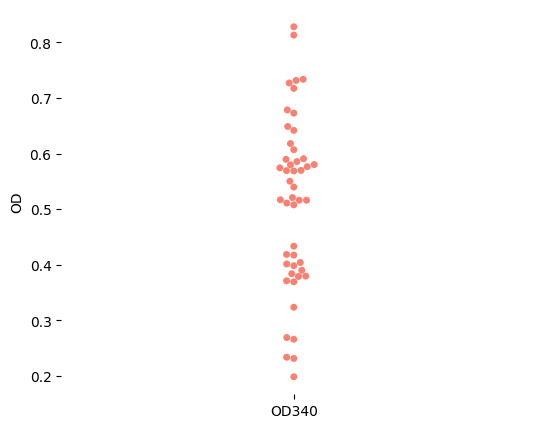

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Measurement Type',
              y='Value',
              palette="dark:salmon_r"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Per line:

In [15]:
line_names = []
df_340 = df[df['Measurement Type']=='OD340'].reset_index()
for i in range(int(len(df_340)/3)):
    line_names.append(str(df_340['Line Name'][3*i])[3:-3])
# line_names

/tmp/ipykernel_64698/2548742498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(line_names, fontsize=8, rotation = 30)


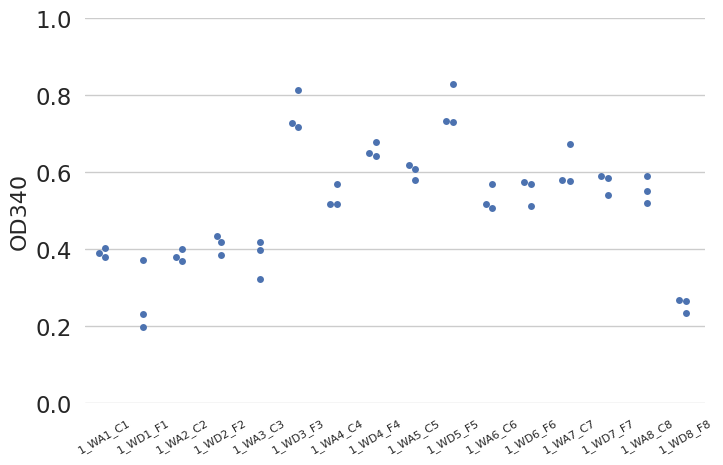

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='Value',
              # hue='Measurement Type',
              # palette="dark:salmon_r",
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
# plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD340", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 1.])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

In [17]:
df

,Line Name,Line Description,Measurement Type,Value,Row,Column
0,C5.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4041,A,1
1,C5.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3901,B,1
2,C5.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3790,C,1
3,C5.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1985,D,1
4,C5.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2315,E,1
5,C5.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3712,F,1
6,C5.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4014,A,2
7,C5.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3694,B,2
8,C5.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3796,C,2
9,C5.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3838,D,2


### Plot OD measurements per well

In [18]:
data_od340 = df[df['Measurement Type']=='OD340'].pivot(index = 'Row', columns = 'Column',values = 'Value')

In [19]:
data_od340.head(6)

Column,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.4041,0.4014,0.4174,0.5169,0.5803,0.5079,0.5765,0.5209
B,0.3901,0.3694,0.3984,0.5162,0.6181,0.5162,0.6729,0.5504
C,0.3790,0.3796,0.3236,0.5688,0.6070,0.5693,0.5798,0.5908
D,0.1985,0.3838,0.7174,0.6418,0.7316,0.5110,0.5399,0.2691
E,0.2315,0.4186,0.8133,0.6786,0.8282,0.5698,0.5897,0.2660
F,0.3712,0.4335,0.7271,0.6488,0.7337,0.5744,0.5857,0.2337


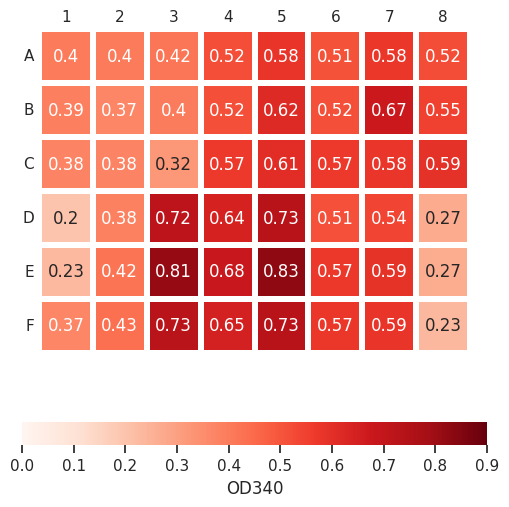

In [20]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                 vmin=0, 
                 vmax=.9
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Load training data and predictions for recommendations:

In [21]:
user_params['target_designs'] = f"{user_params['output_file_path']}/target_concentrations.csv"

In [22]:
designs_pred = pd.read_csv(user_params['target_designs'], index_col=0).reset_index()
designs_pred.drop(columns='Well', inplace=True)
designs_pred['OD340'] = df[df['Measurement Type']=='OD340']['Value'].values
designs_pred = designs_pred[designs_pred['OD340']<0.8]

designs_pred.head(48)


,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340_pred,OD340_std,Label,OD340
0,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.000040,0.496440,0.099114,explore,0.4041
1,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.000040,0.496440,0.099114,explore,0.3901
2,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.000040,0.496440,0.099114,explore,0.3790
3,0.018298,0.557728,0.479902,0.071367,15.011862,0.039414,662.711936,0.000265,0.002673,0.001118,0.001638,0.000010,0.495310,0.099055,explore,0.1985
4,0.018298,0.557728,0.479902,0.071367,15.011862,0.039414,662.711936,0.000265,0.002673,0.001118,0.001638,0.000010,0.495310,0.099055,explore,0.2315
5,0.018298,0.557728,0.479902,0.071367,15.011862,0.039414,662.711936,0.000265,0.002673,0.001118,0.001638,0.000010,0.495310,0.099055,explore,0.3712
6,0.021191,0.747817,0.700241,0.063038,16.489651,0.105661,470.249173,0.000246,0.002149,0.001422,0.002613,0.000227,0.707219,0.072697,exploit,0.4014
7,0.021191,0.747817,0.700241,0.063038,16.489651,0.105661,470.249173,0.000246,0.002149,0.001422,0.002613,0.000227,0.707219,0.072697,exploit,0.3694
8,0.021191,0.747817,0.700241,0.063038,16.489651,0.105661,470.249173,0.000246,0.002149,0.001422,0.002613,0.000227,0.707219,0.072697,exploit,0.3796
9,0.020822,0.796548,1.014490,0.060333,16.197726,0.087100,499.930374,0.000246,0.002150,0.001158,0.001761,0.000151,0.705099,0.072742,exploit,0.3838


In [32]:
#show media formulations of the highest producers
designs_pred[designs_pred['OD340']>0.7]

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340_pred,OD340_std,Label,OD340
15,0.021155,0.756038,0.720313,0.059491,17.216778,0.133274,482.480012,0.000246,0.002126,0.001294,0.001683,0.000192,0.704760,0.072670,exploit,0.7174
17,0.021155,0.756038,0.720313,0.059491,17.216778,0.133274,482.480012,0.000246,0.002126,0.001294,0.001683,0.000192,0.704760,0.072670,exploit,0.7271
27,0.020187,0.628602,0.714762,0.064923,16.442087,0.071574,488.110934,0.000255,0.002125,0.001648,0.002065,0.000100,0.704054,0.073139,exploit,0.7316
29,0.020187,0.628602,0.714762,0.064923,16.442087,0.071574,488.110934,0.000255,0.002125,0.001648,0.002065,0.000100,0.704054,0.073139,exploit,0.7337


In [44]:
optimal_media = designs_pred[designs_pred['OD340']>0.733]
optimal_media = optimal_media[optimal_media.columns[:-4]]
optimal_media.transpose()

,29
H3BO3[mM],0.020187
K2SO4[mM],0.628602
K2HPO4[mM],0.714762
FeSO4[mM],0.064923
NH4Cl[mM],16.442087
MgCl2[mM],0.071574
NaCl[mM],488.110934
(NH4)6Mo7O24[mM],0.000255
CoCl2[mM],0.002125
CuSO4[mM],0.001648


In [23]:
user_params['train_data'] = f'../flaviolin data/DBTL{CYCLE}/train_pred.csv'

In [24]:
train_pred = pd.read_csv(user_params['train_data'], index_col=0)
train_pred = train_pred[train_pred['OD340']>0.1]

In [25]:
def predictions_vs_observations(
    designs,
    train,
    errorbars_flag=False,
    xlim=None,
    ylim=None,
):
    
    plt.style.use("seaborn-white")

    fontsize = 20

    fig, ax = plt.subplots(figsize=(7, 7))
    
    obs_all = np.append(train['OD340'], designs['OD340'])
    pred_all = np.append(train['OD340_cv_pred'], designs['OD340_pred'])
    pred_std_all = np.append(train['OD340_cv_std'], designs['OD340_std'])
   
    
    # Plot Scatter Plot
    if errorbars_flag:
        plt.errorbar(
            obs_all,
            pred_all,
            yerr=1.96 * pred_std_all,
            fmt='none',
            ecolor="lightgray",
            elinewidth=1,
            alpha=0.5,
            zorder=0
        )
            
    plt.scatter(
        train['OD340'], 
        train['OD340_cv_pred'], 
        color="gray",
        label='train'
    )

    standard = train[train['Label']=='standard']
    plt.scatter(
        standard['OD340'], 
        standard['OD340_cv_pred'],
        label='standard',
        color="k"
    )
    
    # standard_des = designs[designs['Label']=='standard']
    # plt.scatter(standard_des['OD340'], standard_des['OD340_pred'], color="k")
    
    exploit_des = designs[designs['Label']=='exploit']
    plt.scatter(
        exploit_des['OD340'], 
        exploit_des['OD340_pred'], 
        color="orangered",
        label='exploitation'
    )
    
    explore_des = designs[designs['Label']=='explore']
    plt.scatter(
        explore_des['OD340'], 
        explore_des['OD340_pred'], 
        color="orange",
        label='exploration'
    )
    
    r2_train = round(r2_score(train['OD340'], train['OD340_cv_pred']), 2)
    
    r2_all = round(r2_score(obs_all, pred_all), 2)

    ax.set_title(f"$R^2$={r2_train}", fontsize=fontsize)
    
    print(f"$R^2$={r2_all}")
    ax.set_xlabel("Observations", fontsize=fontsize)
    ax.set_ylabel("Cross-validation predictions", fontsize=fontsize)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    if xlim is None:
        ax.set_xlim(lims)
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim(lims)
    else:
        ax.set_ylim(ylim)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    
    plt.legend(loc='best', 
               fontsize=fontsize-4)

    plt.tick_params(axis="both", which="major", labelsize=fontsize)
    plt.show()

    fig.savefig(
        user_params['output_file_path']
        + "/predictions_vs_observations.png",
        bbox_inches="tight",
        transparent=False,
        dpi=300,
    )

    plt.close(fig)

$R^2$=0.42


/tmp/ipykernel_64698/1004933420.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


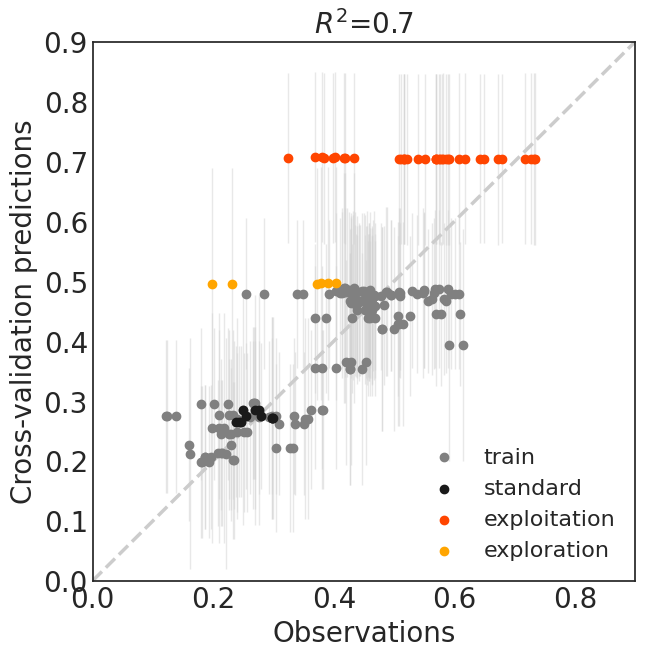

In [26]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0., 0.9],
    ylim=[0., 0.9],
)

## Inspect designs

In [27]:
df_all = train_pred.drop(
    columns=['OD340_pred','OD340_std', 'OD340_cv_pred', 'OD340_cv_std']
)
df_all = pd.concat([df_all,
    designs_pred]).drop(
        columns=['OD340_pred','OD340_std']
).reset_index(drop=True)

In [28]:
# df_all['OD340_yield'] = df_all['OD340']

In [29]:
df_all.head()

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340,Label
0,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2076,train
1,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2149,train
2,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2124,train
3,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.1955,train
4,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.1859,train


In [30]:
titer_max_ind = df_all['OD340'].nlargest(3).index
df_all.loc[titer_max_ind]

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340,Label
198,0.020187,0.628602,0.714762,0.064923,16.442087,0.071574,488.110934,0.000255,0.002125,0.001648,0.002065,0.000100,0.7337,exploit
197,0.020187,0.628602,0.714762,0.064923,16.442087,0.071574,488.110934,0.000255,0.002125,0.001648,0.002065,0.000100,0.7316,exploit
187,0.021155,0.756038,0.720313,0.059491,17.216778,0.133274,482.480012,0.000246,0.002126,0.001294,0.001683,0.000192,0.7271,exploit


In [31]:
yield_max_ind = df_all['OD340_yield'].nlargest(1).index
df_all.loc[yield_max_ind]

KeyError: 'OD340_yield'

In [ ]:
df_all.loc[int((yield_max_ind).values):int((yield_max_ind).values)+2]

In [ ]:
titer_max = df_all.loc[titer_max_ind]['OD340'].mean()
yield_max = (
    df_all.loc[int((yield_max_ind).values):int((yield_max_ind).values)+2]['OD340_yield']
).mean()

In [ ]:
titer_max, yield_max

In [ ]:
titer_standard = df_all[df_all['Label']=='standard']['OD340'].mean()
yield_standard = df_all[df_all['Label']=='standard']['OD340_yield'].mean()
titer_standard, yield_standard

In [ ]:
improvement = 100*(titer_max/titer_standard-1)
f'Improvement in titer over the control: {improvement:.2f}%'


In [ ]:
improvement = 100*(yield_max/yield_standard-1)
f'Improvement in yield over the control: {improvement:.2f}%'

In [ ]:
df_all = df_all.drop(columns=['Label'])


In [ ]:
df_high = df_all[df_all['OD340_yield'] >= 0.015]
df_low = df_all[df_all['OD340_yield'] <= 0.015]

In [ ]:
len(df_high), len(df_low)

In [ ]:
df_bounds = pd.read_csv(user_params['bounds_file'])

In [ ]:
def designs_pairwise(df_high, df_low, bounds):

    components = df_high.columns[:-2]
    dim = len(components)
#     print(f'dim={dim}')

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X_high = df_high[components].values
    X_low = df_low[components].values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            
            ax.scatter(
                X_high[:, var1],
                X_high[:, var2],
                c="g",
                marker="+",
                s=150*df_high['OD340'],
                lw=1,
                label="high",
            )
            ax.scatter(
                X_low[:, var1],
                X_low[:, var2],
                c="r",
                marker="+",
                s=150*df_low['OD340'],
                lw=1,
                label="low",
            )
            xlims = np.asarray([
                bounds[bounds['Variable']==components[var1]]['Min'],
                bounds[bounds['Variable']==components[var1]]['Max']
            ])
            ylims = np.asarray([
                bounds[bounds['Variable']==components[var2]]['Min'],
                bounds[bounds['Variable']==components[var2]]['Max']
            ])
            ax.set_xlim(xlims)
            ax.set_ylim(ylims)
                        
            if var2 == (dim - 1):
                ax.set_xlabel(components[var1])
            if var1 == 0:
                ax.set_ylabel(components[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(
        f'{user_params["output_file_path"]}/designs_pairwise_high.png',
        bbox_inches="tight",
        transparent=False, 
        dpi=300
    )

In [ ]:
designs_pairwise(df_high, df_low, df_bounds)

In [ ]:
from matplotlib import cm
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10), sharey=True, constrained_layout=True)

cmap_name = 'tab20b'
colors = cm.get_cmap(cmap_name)

components = df_all.columns[:-2]

for component, ax in zip(components, axs.ravel()[:-2]):
    ax.scatter(
        df_all[component], 
        df_all['OD340_yield'], 
        color=colors(1), 
        marker='o', 
        )
    ax.set_xlabel(component)
    ax.set_ylabel('OD340_yield')
    
fig.savefig(
    f'{user_params["output_file_path"]}/Yield_per_component.png',
    bbox_inches="tight",
    transparent=False, 
    dpi=300
)